# MNE Tutorial: Different ways of visualizing an EEG signal
This notebook will teach you how to use the MNE library to plot EEG data. 

In [1]:
import mne # MNE is already installed in the kaggle image. pip install is not required.

import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt

# Loading the dataset
This dataset comes in separate csv files. We will concat them into a single Pandas DataFrame. 

In [2]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('../input/Alcoholics/SMNI_CMI_TRAIN/*.csv')):
    _dfs_list.append(pd.read_csv(csv_filename))
df = pd.concat(_dfs_list)
del(_dfs_list)
df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

100%|██████████| 468/468 [00:16<00:00, 27.72it/s]


,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,26,FP1,0,-5.625,c,S1 obj,0,co2c0000344,0.000000
1,26,FP1,1,-3.184,c,S1 obj,0,co2c0000344,0.003906
2,26,FP1,2,-0.254,c,S1 obj,0,co2c0000344,0.007812


In [3]:
# correct the 'sensor position' names

channel_list = list(set(df['sensor position']))
channel_list.sort()

channel_mapping = {
    'AFZ':'AFz', 
    'CPZ':'CPz', 
    'CZ':'Cz', 
    'FCZ':'FCz', 
    'FP1':'Fp1',
    'FP2':'Fp2', 
    'FPZ':'Fpz', 
    'FZ':'Fz', 
    'OZ':'Oz', 
    'POZ':'POz', 
    'PZ':'Pz',
}

channel_mapping_full = dict()

for ch in channel_list:
    if ch in channel_mapping:
        channel_mapping_full[ch] = channel_mapping[ch]
    else:
        channel_mapping_full[ch] = ch

channel_list_fixed = [channel_mapping_full[ch] for ch in channel_list]
        
df['sensor position'] = df['sensor position'].map(channel_mapping_full)
df.head(3)

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,26,Fp1,0,-5.625,c,S1 obj,0,co2c0000344,0.000000
1,26,Fp1,1,-3.184,c,S1 obj,0,co2c0000344,0.003906
2,26,Fp1,2,-0.254,c,S1 obj,0,co2c0000344,0.007812


In [4]:
# transpose the table to make the data extraction easier

transposed_df_list = []

for group_df in tqdm(df.groupby(['name', 'trial number', 'matching condition', 'sensor position', 'subject identifier'])):
    _df = pd.DataFrame(group_df[1]['sensor value']).T
    _df.columns = [f'sample_{idx}' for idx in range(256)]
    _df['name'] = group_df[0][0]
    _df['trial number'] = group_df[0][1]
    _df['matching condition'] = group_df[0][2]
    _df['sensor position'] = group_df[0][3]
    _df['subject identifier'] = group_df[0][4]
    
    transposed_df_list.append(_df)
    
df = pd.concat(transposed_df_list)
df = df[[*df.columns[-5:],*df.columns[0:-5]]]
df = df.reset_index(drop=True)
df.head(3)

100%|██████████| 29952/29952 [01:16<00:00, 392.77it/s]


,name,trial number,matching condition,sensor position,subject identifier,sample_0,sample_1,sample_2,sample_3,sample_4,...,sample_246,sample_247,sample_248,sample_249,sample_250,sample_251,sample_252,sample_253,sample_254,sample_255
0,co2a0000364,0,S1 obj,AF1,a,-2.146,-2.146,-1.658,-0.682,2.248,...,-1.658,0.295,2.736,4.201,3.713,1.272,-0.682,-0.193,3.225,7.619
1,co2a0000364,0,S1 obj,AF2,a,1.129,0.641,-0.336,-0.824,0.641,...,4.059,-0.336,-2.777,-0.824,3.571,5.035,4.059,2.106,1.617,4.059
2,co2a0000364,0,S1 obj,AF7,a,-16.856,-7.090,7.558,19.277,23.183,...,17.324,9.511,1.699,-2.207,-2.207,1.211,5.117,8.046,10.000,11.464


# Displaying raw signal as an image
You can use the images for CNN training

In [5]:
def get_record_df(df, name, trial_number, matching_condition, channel_list):
    df_record = df[df['name'].eq(name) & df['trial number'].eq(trial_number) & df['matching condition'].eq(matching_condition)].set_index(['sensor position']).loc[channel_list]
    return df_record

df_record = get_record_df(df, 'co2a0000364', 0, 'S1 obj', channel_list_fixed)
df_record

,name,trial number,matching condition,subject identifier,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,...,sample_246,sample_247,sample_248,sample_249,sample_250,sample_251,sample_252,sample_253,sample_254,sample_255
sensor position,,,,,,,,,,,,,,,,,,,,,
AF1,co2a0000364,0,S1 obj,a,-2.146,-2.146,-1.658,-0.682,2.248,5.178,...,-1.658,0.295,2.736,4.201,3.713,1.272,-0.682,-0.193,3.225,7.619
AF2,co2a0000364,0,S1 obj,a,1.129,0.641,-0.336,-0.824,0.641,3.571,...,4.059,-0.336,-2.777,-0.824,3.571,5.035,4.059,2.106,1.617,4.059
AF7,co2a0000364,0,S1 obj,a,-16.856,-7.090,7.558,19.277,23.183,18.789,...,17.324,9.511,1.699,-2.207,-2.207,1.211,5.117,8.046,10.000,11.464
AF8,co2a0000364,0,S1 obj,a,-10.020,-7.090,1.211,10.488,13.906,10.976,...,28.554,27.089,15.859,0.722,-10.020,-10.997,-2.696,9.511,18.789,21.230
AFz,co2a0000364,0,S1 obj,a,-0.987,-1.475,-0.987,-0.010,2.431,4.873,...,0.478,-0.498,-0.498,0.478,0.966,0.966,0.966,0.478,2.431,5.361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TP7,co2a0000364,0,S1 obj,a,-9.338,-12.268,-8.850,-1.526,4.822,7.263,...,19.958,14.587,3.357,-6.897,-9.827,-3.967,6.775,14.587,16.052,13.123
TP8,co2a0000364,0,S1 obj,a,-3.082,-4.059,-3.571,-1.129,2.777,6.195,...,2.777,2.289,0.824,0.336,1.312,3.265,4.242,2.777,-0.153,-2.594
X,co2a0000364,0,S1 obj,a,-5.269,-5.758,-2.828,1.567,5.961,9.379,...,19.145,18.168,16.215,13.774,10.844,8.891,8.891,11.820,17.680,23.539


In [6]:
def get_signal_array(df, name, trial_number, matching_condition, channel_list):
    df_record = get_record_df(df, name, trial_number, matching_condition, channel_list)
    return df_record.to_numpy()[:, 4:]

signal_array = get_signal_array(df, 'co2a0000364', 10, 'S1 obj', channel_list_fixed)
signal_array.shape

(64, 256)

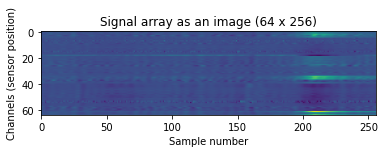

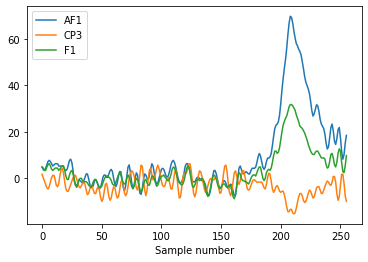

In [7]:
plt.title('Signal array as an image (64 x 256)')
plt.ylabel('Channels (sensor position)');
plt.xlabel('Sample number');
plt.imshow(signal_array.astype(int));
plt.show()

channels_to_display = ['AF1', 'CP3', 'F1']
for channel in channels_to_display:
    plt.xlabel('Sample number');
    plt.plot(signal_array[channel_list.index(channel)]);
plt.legend(channels_to_display);

# Load signal data to an MNE Raw object
Create Info object. input = channel list, data freq, channel types 

Create Raw object. input = the signal array and the Info object

Set Raw object montage. After we attach a montage to the signal, we can display it in a topmap.

In [8]:
info = mne.create_info(ch_names=channel_list_fixed, sfreq=256, ch_types=['eeg']*64)
raw = mne.io.RawArray(signal_array, info)

standard_1020_montage = mne.channels.make_standard_montage('standard_1020');
raw.drop_channels(['X', 'Y', 'nd'])
raw.set_montage(standard_1020_montage)

Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.


<RawArray | 61 x 256 (1.0 s), ~209 kB, data loaded>

# Plot freqs

Effective window size : 1.000 (s)


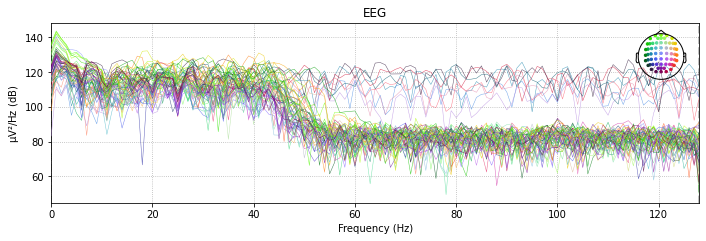

Effective window size : 1.000 (s)


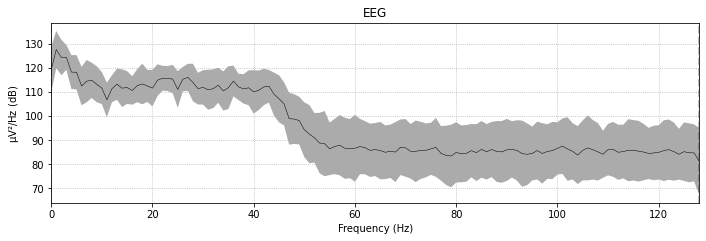

In [9]:
raw.plot_psd();
raw.plot_psd(average=True);

# Apply filter

Effective window size : 1.000 (s)


/tmp/ipykernel_19/2099550416.py:1: RuntimeWarning: filter_length (423) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  raw_filtered = raw.copy().filter(8,30, verbose=False);


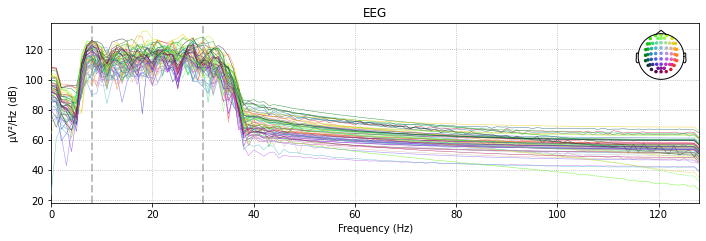

Effective window size : 1.000 (s)


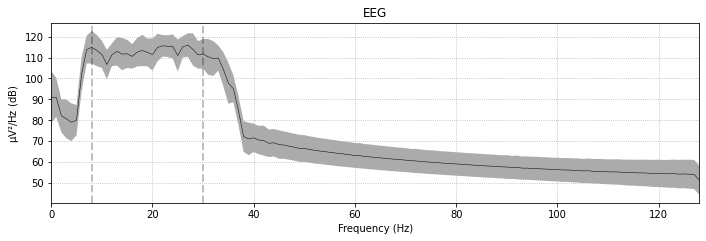

In [10]:
raw_filtered = raw.copy().filter(8,30, verbose=False);
raw_filtered.plot_psd();
raw_filtered.plot_psd(average=True);

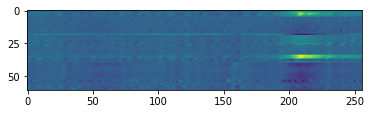

/tmp/ipykernel_19/3450553692.py:3: RuntimeWarning: filter_length (845) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  plt.imshow(raw.copy().filter(1,10, verbose=False).get_data());


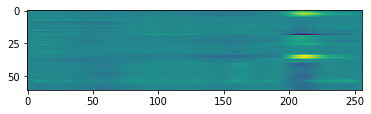

/tmp/ipykernel_19/3450553692.py:6: RuntimeWarning: filter_length (423) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  plt.plot(raw.copy().filter(8,30, verbose=False).get_data()[40])


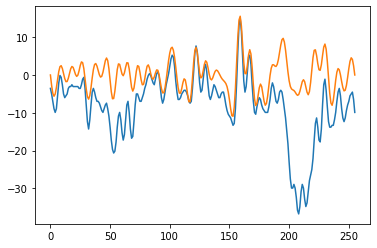

In [11]:
plt.imshow(raw.get_data())
plt.show()
plt.imshow(raw.copy().filter(1,10, verbose=False).get_data());
plt.show()
plt.plot(raw.copy().get_data()[40])
plt.plot(raw.copy().filter(8,30, verbose=False).get_data()[40])

# ICA

/tmp/ipykernel_19/858203707.py:2: RuntimeWarning: filter_length (845) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  ica.fit(raw.copy().filter(1,None, verbose=False), verbose=False)


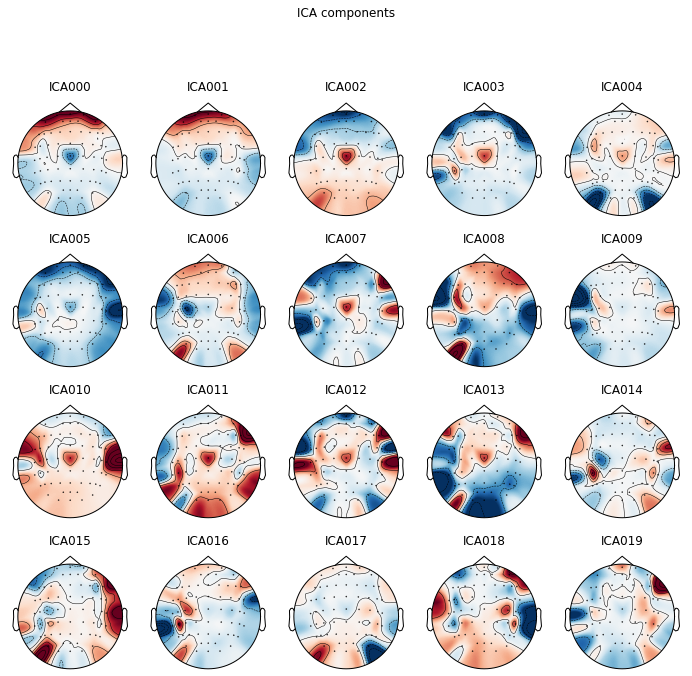

[<MNEFigure size 702x696.24 with 20 Axes>]

In [12]:
ica = mne.preprocessing.ICA(random_state=42, n_components=20)
ica.fit(raw.copy().filter(1,None, verbose=False), verbose=False)
ica.plot_components()

# Plot a topographic map as an image

In [13]:
def plot_eeg_topomap(signal_array, save_path_animation=None, show_names=False, start_time=0.05, end_time=1, step_size=0.1):
    # select channel X,Y format
    montage = mne.channels.make_standard_montage('standard_1020')
    
    # remove channels that don't have X,Y positions
    ch_to_remove = []
    for ch in channel_list_fixed:
        if ch not in list(set(montage.ch_names).intersection(channel_list_fixed)):
            ch_to_remove.append(channel_list_fixed.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)
    
    # create info+evoked objects
    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list_fixed)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)
    
    # set channel X,Y positions
    evoked.set_montage(montage)

    # plot img
    evoked.plot_topomap(np.arange(start_time, end_time, step_size), ch_type='eeg', time_unit='s', ncols=5, nrows=2, show_names=show_names);

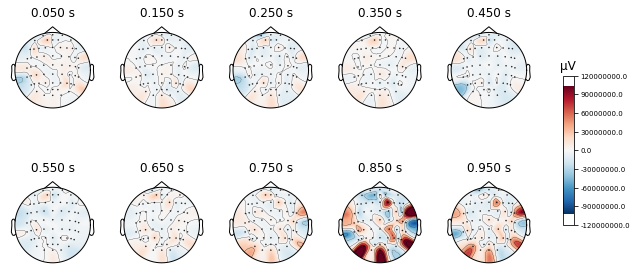

In [14]:
plot_eeg_topomap(signal_array, show_names=False)

# Plot a topographic map as an animation

In [15]:
def plot_eeg_topomap_animation(signal_array, save_path_animation, start_time=0.00, end_time=1, step_size=0.01, frame_rate=10):
    # select channel X,Y format
    montage = mne.channels.make_standard_montage('standard_1020')
    
    # remove channels that don't have X,Y positions
    ch_to_remove = []
    for ch in channel_list_fixed:
        if ch not in list(set(montage.ch_names).intersection(channel_list_fixed)):
            ch_to_remove.append(channel_list_fixed.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)
    
    # create info+evoked objects
    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list_fixed)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)
    
    # set channel X,Y positions
    evoked.set_montage(montage)
    
    # (optional) plot and save animation
    if save_path_animation:
        fig, anim = evoked.animate_topomap(times=np.arange(start_time, end_time, step_size), frame_rate=frame_rate, butterfly=True, blit=False, );
        anim.save(save_path_animation);
        print('saved to', save_path_animation)

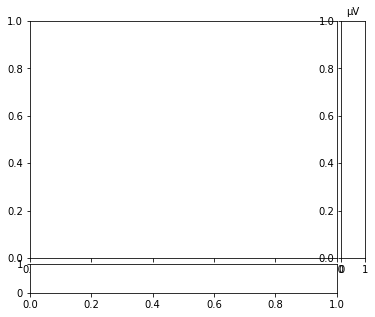

Initializing animation...
saved to ./gif.gif


In [16]:
plot_eeg_topomap_animation(signal_array, './gif.gif')

![](./gif.gif)

No projector specified for this dataset. Please consider the method self.add_proj.


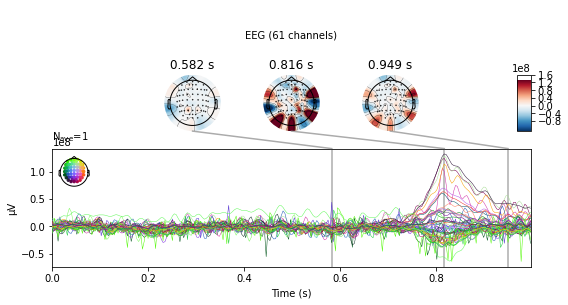

In [17]:
def plot_eeg_joint_topomap(signal_array, save_path_animation=None, show_names=False, start_time=0.05, end_time=1, step_size=0.1):
    # select channel X,Y format
    montage = mne.channels.make_standard_montage('standard_1020')
    
    # remove channels that don't have X,Y positions
    ch_to_remove = []
    for ch in channel_list_fixed:
        if ch not in list(set(montage.ch_names).intersection(channel_list_fixed)):
            ch_to_remove.append(channel_list_fixed.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)
    
    # create info+evoked objects
    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list_fixed)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)
    
    # set channel X,Y positions
    evoked.set_montage(montage)

    # plot img
    evoked.plot_joint();
    
plot_eeg_joint_topomap(signal_array)

In [18]:
#https://www.youtube.com/watch?v=wNIaT1UT6rI&list=PLXtvZiGkmNVvPS0N9UNBVkIFe0_0t_Nqt&index=3